In [ ]:
!rm -r ./dirty_mnist_2nd
!rm -r ./mnist_data
!rm -r ./test_dirty_mnist_2nd
!mkdir ./dirty_mnist_2nd
!mkdir ./mnist_data
!mkdir ./test_dirty_mnist_2nd
!unzip "/content/drive/MyDrive/Colab Notebooks/(데이콘)컴퓨터비전2/dirty_mnist_2nd.zip" -d ./dirty_mnist_2nd
!unzip "/content/drive/MyDrive/Colab Notebooks/(데이콘)컴퓨터비전2/mnist_data.zip" -d ./mnist_data
!unzip "/content/drive/MyDrive/Colab Notebooks/(데이콘)컴퓨터비전2/test_dirty_mnist_2nd.zip" -d ./test_dirty_mnist_2nd
!cp "/content/drive/MyDrive/Colab Notebooks/(데이콘)컴퓨터비전2/dirty_mnist_2nd_answer.csv" ./
!cp "/content/drive/MyDrive/Colab Notebooks/(데이콘)컴퓨터비전2/sample_submission.csv" ./

In [2]:
from glob import glob

train_img_path_list = sorted(glob('./dirty_mnist_2nd/*.png'))
test_img_path_list = sorted(glob('./test_dirty_mnist_2nd/*.png'))

print(len(train_img_path_list))
print(len(test_img_path_list))

50000
5000


In [3]:
import pandas as pd

train_y = pd.read_csv('./dirty_mnist_2nd_answer.csv').values[:,1:]
train_y.shape

(50000, 26)

In [4]:
import numpy as np

sub_x = pd.read_csv('./mnist_data/train.csv').values[:,3:].astype(np.uint8)
sub_y = pd.read_csv('./mnist_data/train.csv').values[:,2]
sub_y = np.array(list(map(lambda x:ord(x)-ord('A'), sub_y)))

print(sub_x.shape)
print(sub_y.shape)

(2048, 784)
(2048,)


./dirty_mnist_2nd/22222.png


,index,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
22222,22222,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1


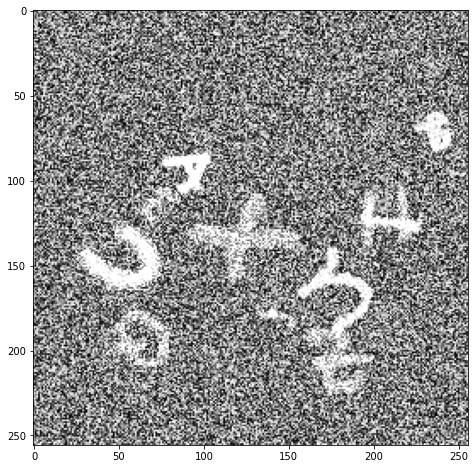

In [233]:
import matplotlib.pyplot as plt
import cv2

ind = 22222
img = cv2.imread(train_img_path_list[ind], cv2.IMREAD_GRAYSCALE)
print(train_img_path_list[ind])
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

pd.read_csv('./dirty_mnist_2nd_answer.csv')[ind:ind+1]

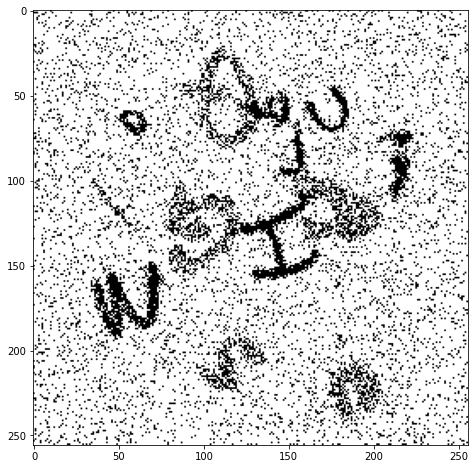

In [217]:
aa = np.where((0<img) & (img<230), 1, 0)

plt.figure(figsize=(8,8))
plt.imshow(aa, cmap='gray')

In [48]:
from tqdm import tqdm

def load_data(path_list):
  data = []
  for path in tqdm(path_list):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE).tolist()
    data.append(img)
  return np.array(data)

In [ ]:
train_x = load_data(train_img_path_list)

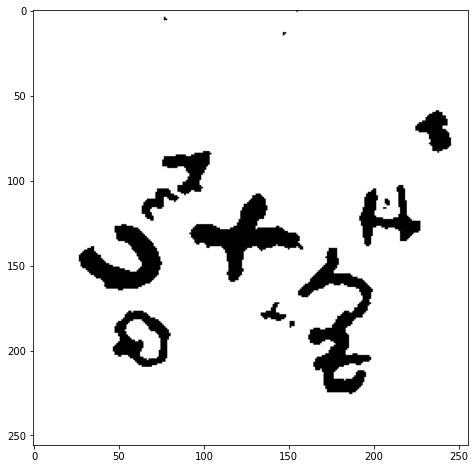

In [256]:
# denoised = cv2.GaussianBlur(img, (1, 1), 1)
denoised = cv2.fastNlMeansDenoising(ero, None, 35, 5, 21)
ret, threshed = cv2.threshold(denoised, 50, 255, cv2.THRESH_BINARY_INV)
# threshed = cv2.adaptiveThreshold(
#     denoised,
#     maxValue = 1,
#     adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#     thresholdType = cv2.THRESH_BINARY_INV,
#     blockSize = 71,
#     C = 9
# )
plt.figure(figsize=(8,8))
plt.imshow(threshed, cmap='gray')

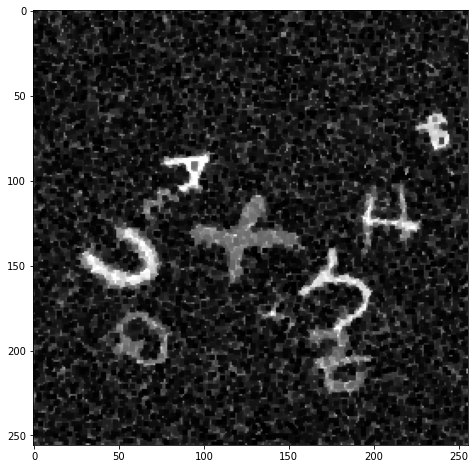

In [246]:
kernel = np.ones((3,3), np.uint8)
ero = cv2.erode(img, kernel, iterations=1)

plt.figure(figsize=(8,8))
plt.imshow(ero, cmap='gray')

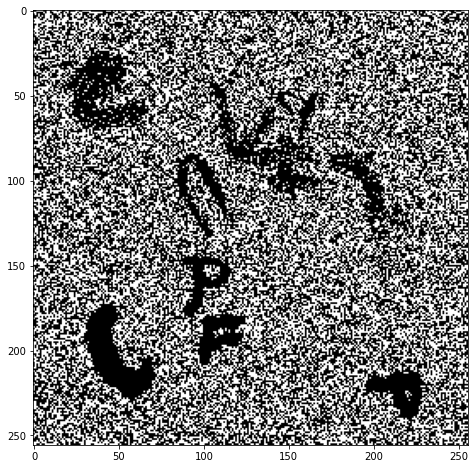

In [169]:
img[img < 128] = 1
img[img >= 128] = 0

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

In [170]:
threshed = img

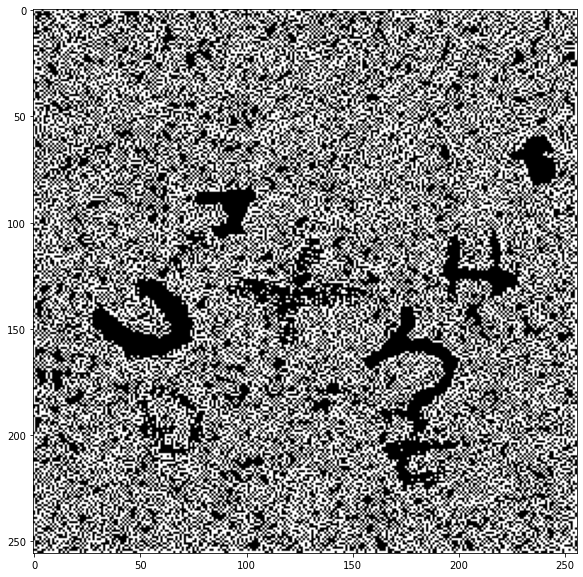

In [225]:
contours, _ = cv2.findContours(threshed, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
temp = np.zeros((256,256), dtype=np.uint8)
cv2.drawContours(temp, contours=contours, contourIdx=-1, color=(1,1))
plt.figure(figsize=(10,10))
plt.imshow(temp, cmap='gray')

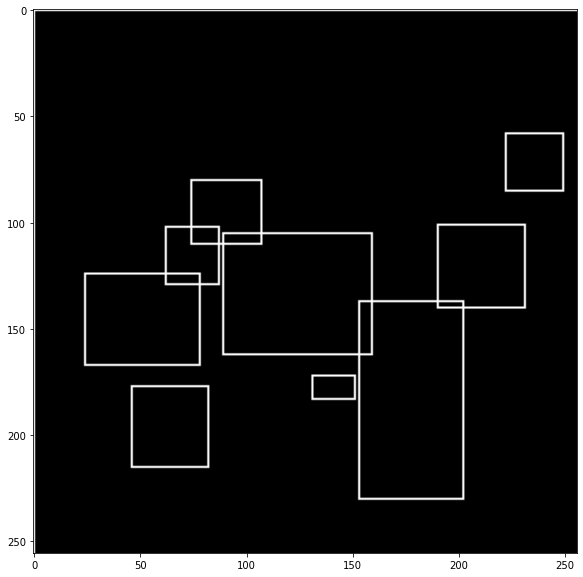

In [230]:
contours_dict = []

for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  area = w * h
  if area < 200: continue
  contours_dict.append({'contour':contour, 'x':x, 'y':y, 'w':w, 'h':h, 'cx':x+(w/2), 'cy':y+(h/2)})

temp = np.zeros((256,256), dtype=np.uint8)
for con_dic in contours_dict:
  x = con_dic['x']
  y = con_dic['y']
  w = con_dic['w']
  h = con_dic['h']
  cv2.rectangle(temp, pt1=(x,y), pt2=(x+w,y+h), color=(1,1), thickness=1)

plt.figure(figsize=(10,10))
plt.imshow(temp, cmap='gray')

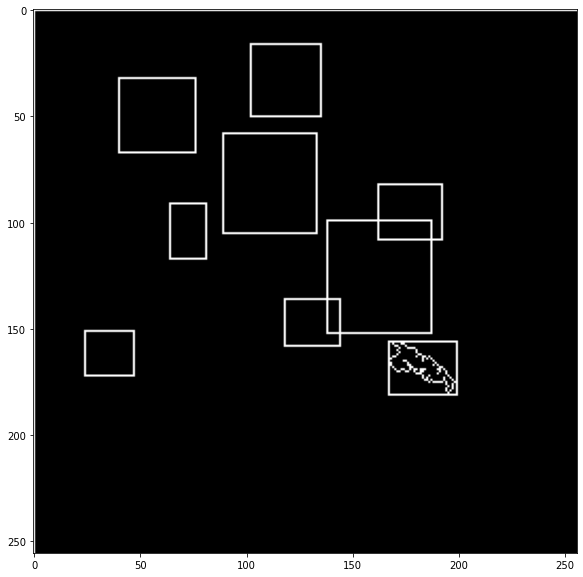

In [195]:

cv2.drawContours(temp, contours=[contours_dict[0]['contour']], contourIdx=-1, color=(1,1))
plt.figure(figsize=(10,10))
plt.imshow(temp, cmap='gray')

In [198]:
contours_dict[0]['contour']

array([[[169, 157]],

       [[170, 156]],

       [[172, 156]],

       [[173, 157]],

       [[174, 157]],

       [[176, 159]],

       [[179, 159]],

       [[180, 160]],

       [[180, 161]],

       [[181, 162]],

       [[180, 163]],

       [[181, 162]],

       [[182, 162]],

       [[183, 163]],

       [[183, 165]],

       [[183, 164]],

       [[184, 163]],

       [[185, 164]],

       [[186, 163]],

       [[189, 166]],

       [[188, 167]],

       [[189, 166]],

       [[191, 168]],

       [[190, 169]],

       [[191, 170]],

       [[190, 171]],

       [[191, 170]],

       [[191, 169]],

       [[192, 168]],

       [[194, 170]],

       [[194, 171]],

       [[198, 175]],

       [[197, 176]],

       [[197, 178]],

       [[195, 180]],

       [[194, 179]],

       [[194, 178]],

       [[195, 177]],

       [[194, 176]],

       [[194, 175]],

       [[193, 174]],

       [[193, 173]],

       [[193, 174]],

       [[192, 175]],

       [[188, 175]],

       [[1